In [30]:
## LOADING THE REQUIRED LIBRARIES
import pandas as pd
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
from tqdm import tqdm 
import tensorflow as tf
from  tensorflow.keras.preprocessing.sequence import pad_sequences
from  sklearn.model_selection import train_test_split
from tqdm import tqdm

In [31]:
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
# The GPU id to use, "0" to  "7" 
os.environ["CUDA_VISIBLE_DEVICES"]="3,4,6"

In [32]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
from tensorflow.python.client import device_lib

Num GPUs Available:  0


In [33]:
## LOADING THE PROCESSED DATASET  

df= pd.read_csv('DATA/etoori_train.csv')
df=df.head(1000)
df.columns = ["enc_input","dec_input"] 
df["dec_output"] = df.dec_input
df.head(2)


,enc_input,dec_input,dec_output
0,परन्तु वे दोनों उन बातों को ज़्यादा समय तक अप ...,परन्तु वे दोनों उन बातों को ज़्यादा समय तक अपन...,परन्तु वे दोनों उन बातों को ज़्यादा समय तक अपन...
1,देश में हिन्दी को विस्थापित कर का षड़यंत्र चल ...,देश में हिन्दी को विस्थापित करने का षड़यंत्र च...,देश में हिन्दी को विस्थापित करने का षड़यंत्र च...


In [34]:
## THE INPUTS TO THE DECODER REQUIRES SPECIAL TOKENS FOR THE START AND THE END SO WE ARE GOING TO USE 
## <start> AS BEGINING TOKEN
## <end>  AS END TOKEN

df["dec_input"]= "<start> " + df["dec_input"]
df["dec_output"] =  df["dec_output"] + " <end>" 
df.head(2)

,enc_input,dec_input,dec_output
0,परन्तु वे दोनों उन बातों को ज़्यादा समय तक अप ...,<start> परन्तु वे दोनों उन बातों को ज़्यादा सम...,परन्तु वे दोनों उन बातों को ज़्यादा समय तक अपन...
1,देश में हिन्दी को विस्थापित कर का षड़यंत्र चल ...,<start> देश में हिन्दी को विस्थापित करने का षड...,देश में हिन्दी को विस्थापित करने का षड़यंत्र च...


In [35]:
df_train ,df_val = train_test_split(df,test_size=0.2,random_state = 3)
print(df_train.shape)
print(df_val.shape)


(800, 3)
(200, 3)


In [104]:
hindi_words =['आदमी','राजा','रानी','साम्राज्य','राजस्थान','दिल्ली','बच्चा','बाघ','जंगल','पूजा','औरत','बंदर','शहर','गाँव','राधा','सड़क','पैसे','काम','अध्ययन']

In [105]:
# import pandas as pd
import pandas as pd


# Calling DataFrame constructor on list
# with indices and columns specified
df = pd.DataFrame(hindi_words,columns =['hindi_words'])

In [106]:
""" Tokenisation """
from indicnlp.tokenize import indic_tokenize
def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):
        if t != '<' or t != '>' or t != 'start' or t != 'end':
            tokens.append(t)
    return tokens

In [107]:
print(type(df_train['enc_input']))
print(type(df['hindi_words']))
print(type(df_train['dec_input']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [108]:
from indicnlp.tokenize import indic_tokenize

def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):

        if t != '<' and t != '>' and t != 'start' and t != 'end':
            tokens.append(t)
    #tokens.insert(0,'<start>')
    #tokens.append('<end>')
    return tokens


h_dec_token_ip = df['hindi_words'].apply(lambda x: tokenization(x))

print(type(h_dec_token_ip))
h_dec_token_ip

<class 'pandas.core.series.Series'>


0          [आदमी]
1          [राजा]
2          [रानी]
3     [साम्राज्य]
4      [राजस्थान]
5        [दिल्ली]
6         [बच्चा]
7           [बाघ]
8          [जंगल]
9          [पूजा]
10          [औरत]
11         [बंदर]
12          [शहर]
13         [गाँव]
14         [राधा]
15         [सड़क]
16         [पैसे]
17          [काम]
18       [अध्ययन]
Name: hindi_words, dtype: object

In [109]:
h_vocab_dec= {}
h_vocab_dec['<unk>']=0
count= 0 
for i in h_dec_token_ip:
    for j in i:
        if j not in h_vocab_dec:
            count=count+1
            h_vocab_dec[j]=count
        else:
            continue

print(len(h_vocab_dec))
print(type(h_vocab_dec))
#print(vocab_dec)
h_vocab_dec_length=len(h_vocab_dec)

20
<class 'dict'>


In [110]:
from indicnlp.tokenize import indic_tokenize

def tokenization(indic_string):
    tokens = []
    for t in indic_tokenize.trivial_tokenize(indic_string):

        if t != '<' and t != '>' and t != 'start' and t != 'end':
            tokens.append(t)
    tokens.insert(0,'<start>')
    tokens.append('<end>')
    return tokens


dec_token_ip = df_train['dec_input'].apply(lambda x: tokenization(x))

print(type(dec_token_ip))


<class 'pandas.core.series.Series'>


In [111]:
vocab_dec= {}
vocab_dec['<unk>']=0
count= 0 
for i in dec_token_ip:
    for j in i:
        if j not in vocab_dec and len(j)>5:
            count=count+1
            vocab_dec[j]=count
        else:
            continue

print(len(vocab_dec))
print(type(vocab_dec))
#print(vocab_dec)
vocab_dec_length=len(vocab_dec)

1676
<class 'dict'>


In [112]:
from matplotlib.font_manager import FontProperties
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
from matplotlib import pylab

%matplotlib inline
#hindi_font = FontProperties(fname='models/Lohit-Devanagari.ttf')
hindi_font = FontProperties(fname='models/Nirmala.ttf')

#num_points = 50
num_points =20
#tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
tsne = TSNE(perplexity=5, n_components=2, init='pca', n_iter=5000, method='exact')
#words_list = list(vocab_dec.keys())[1:num_points+1]
words_list = list(h_vocab_dec.keys())[1:num_points+1]

def plot(word_embeddings, labels,name):
    two_d_embeddings = tsne.fit_transform(word_embeddings[1:num_points+1, :])
    assert two_d_embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(5, 5))
    for i, label in enumerate(labels):
        x, y = two_d_embeddings[i, :]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', fontproperties=hindi_font)
    pylab.show()
    pylab.savefig(name)

<font size ="6"><b>Word2Vec</b></font>

In [62]:
#Pretrained Word2Vec model
from gensim.test.utils import common_texts
from gensim.models import Word2Vec

#model = Word2Vec.load("/DATA/garg15/Hindi/hi-d300-m2-cbow.model")
word_emb = Word2Vec.load("models/pretrained/word2vec/hi-d300-m2-cbow.model")

In [63]:
word = "पूजा"
print("Embedding Shape is {}".format(word_emb.wv[word].shape))
print("Nearest Neighbors to {} using Word2Vec are:".format(word))
word_emb.wv.most_similar(word)

Embedding Shape is (300,)
Nearest Neighbors to पूजा using Word2Vec are:


[('आराधना', 0.7864888310432434),
 ('पुजा', 0.7753461599349976),
 ('पूजन', 0.7515121102333069),
 ('अराधना', 0.7468945384025574),
 ('उपासना', 0.7327789664268494),
 ('पुजन', 0.6703079342842102),
 ('आरती', 0.6687861680984497),
 ('प्राणप्रतिष्ठा', 0.6564066410064697),
 ('पूजापाठ', 0.6346961259841919),
 ('अर्चना', 0.6229457259178162)]

In [113]:
## FORMING EMBEDDING MATRIX FOR Decoder SENTENCE
h_word2vec_embedding_matrix_dec = np.zeros((h_vocab_dec_length,300))

for word,index in tqdm(h_vocab_dec.items()):
    try:
        vec = word_emb.wv[word]
        h_word2vec_embedding_matrix_dec[index] = vec
    except:     
        continue

print("hindi word2vec_embedding_matrix_dec")

print(h_word2vec_embedding_matrix_dec.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 20/20 [00:00<00:00, 18125.77it/s]

hindi word2vec_embedding_matrix_dec
(20, 300)


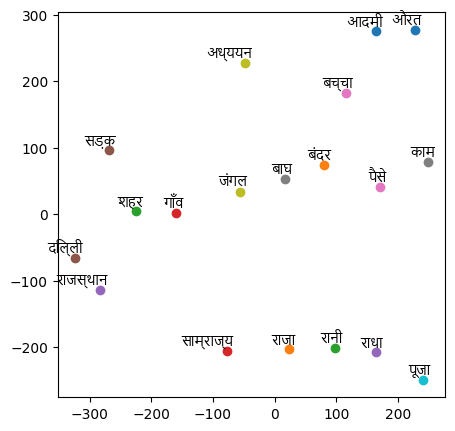

<Figure size 640x480 with 0 Axes>

In [114]:
# Plot for Word2Vec
plot(h_word2vec_embedding_matrix_dec, words_list,"word2vec_plot")

In [46]:
## FORMING EMBEDDING MATRIX FOR Decoder SENTENCE
word2vec_embedding_matrix_dec = np.zeros((vocab_dec_length,300))

for word,index in tqdm(vocab_dec.items()):
    try:
        vec = word_emb.wv[word]
        word2vec_embedding_matrix_dec[index] = vec
    except:     
        continue

print("word2vec_embedding_matrix_dec")

print(word2vec_embedding_matrix_dec.shape)

100%|███████████████████████████████████████████████████████████████████████████████████████████| 1676/1676 [00:00<00:00, 78649.95it/s]

word2vec_embedding_matrix_dec
(1676, 300)


In [47]:
hindi_words =['आदमी','महिला','राजा','रानी','साम्राज्य','राजस्थान','दिल्ली','इंडिया','परिवार','बच्चा','सिंह','बाघ','जंगल','मंदिर','पूजा','पंडित']

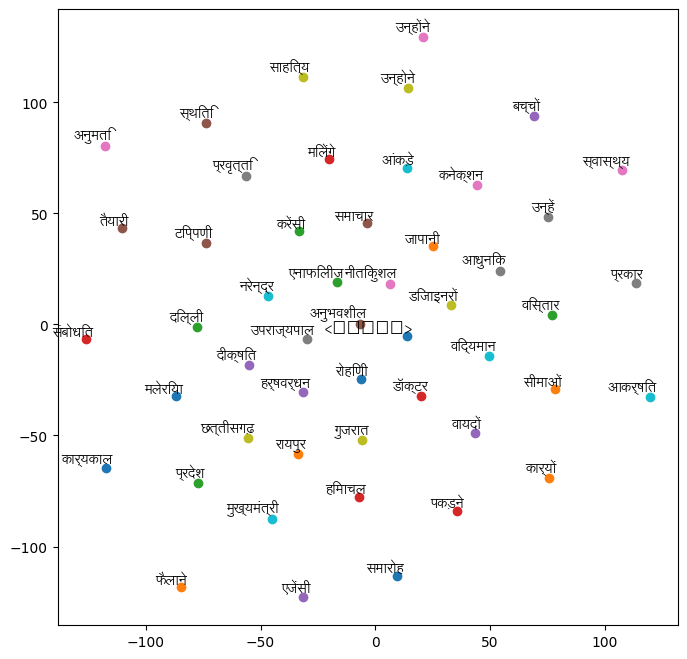

<Figure size 640x480 with 0 Axes>

In [51]:

#Plot
#word = "पूजा"

# Plot for Word2Vec
plot(word2vec_embedding_matrix_dec, words_list,"word2vec_plot")

<font size ="6"><b>Glove</b></font>

In [115]:
"""# Glove embeddings """

embeddings_index = dict()

with open ("models/hi-d300-glove.txt", encoding="utf8", errors='ignore') as f: 

    for line in f:

        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs
   
f.close()

print('loaded glove vectors')

loaded glove vectors


In [116]:
len(embeddings_index)

1732951

In [81]:
## FORMING EMBEDDING MATRIX FOR encoder SENTENCE
"""
Embedding_dimensions=300
glove_embedding_matrix_enc = np.zeros((vocab_ip_length,Embedding_dimensions))

for word, i in vocab_ip.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        glove_embedding_matrix_enc[i] = embedding_vector

print(glove_embedding_matrix_enc.shape)
"""

print("")

In [117]:
## FORMING EMBEDDING MATRIX FOR decoder SENTENCE
Embedding_dimensions=300
h_glove_embedding_matrix_dec  = np.zeros((h_vocab_dec_length,Embedding_dimensions))

for word, i in h_vocab_dec.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        h_glove_embedding_matrix_dec[i] = embedding_vector
        
print(h_glove_embedding_matrix_dec.shape)

(20, 300)


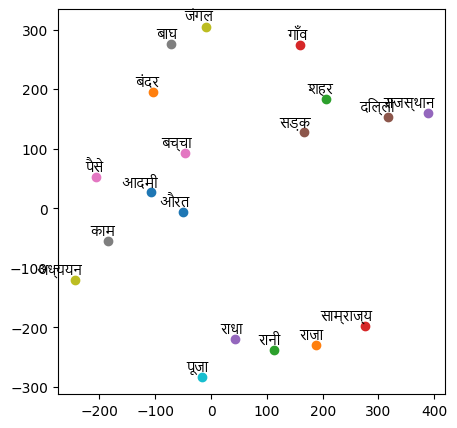

<Figure size 640x480 with 0 Axes>

In [118]:
plot(h_glove_embedding_matrix_dec, words_list,"glove_plot")

In [82]:
## FORMING EMBEDDING MATRIX FOR decoder SENTENCE
Embedding_dimensions=300
glove_embedding_matrix_dec  = np.zeros((vocab_dec_length,Embedding_dimensions))

for word, i in vocab_dec.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        glove_embedding_matrix_dec[i] = embedding_vector
        
print(glove_embedding_matrix_dec.shape)

(1676, 300)


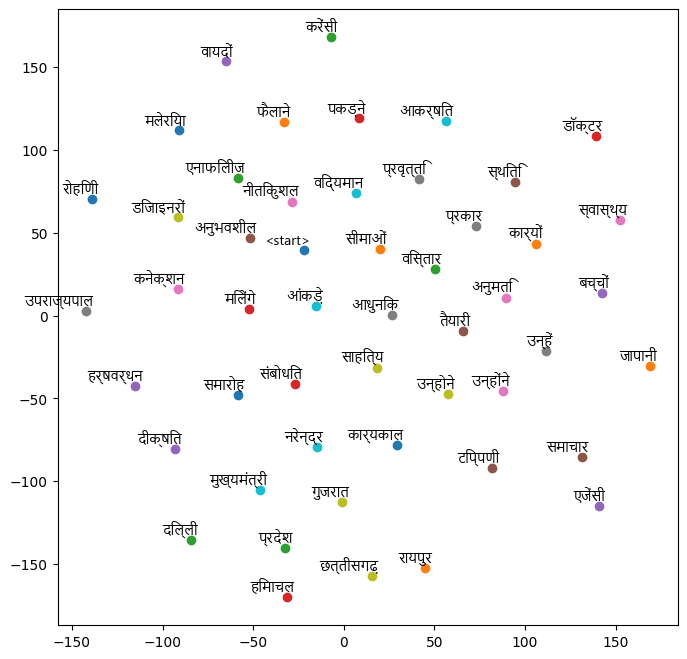

<Figure size 640x480 with 0 Axes>

In [83]:
plot(glove_embedding_matrix_dec, words_list,"glove_plot")

<font size ="6"><b>Fasttext</b></font>

In [119]:
import fasttext
import fasttext.util
ft = fasttext.load_model('models/wiki.hi.bin')

In [120]:
word = "पूजा"
print("Embedding Shape is {}".format(ft.get_word_vector(word).shape))
print("Nearest Neighbors to {} are:".format(word))
ft.get_nearest_neighbors(word)

Embedding Shape is (300,)
Nearest Neighbors to पूजा are:


[(0.7876037955284119, 'पूजां'),
 (0.7792069911956787, 'पूजा।'),
 (0.7434489130973816, 'पूजारी'),
 (0.7403855919837952, 'देवपूजा'),
 (0.736215353012085, 'पूजापाठ'),
 (0.7296294569969177, 'पूजाओं'),
 (0.7163258790969849, 'अर्चना'),
 (0.7134318947792053, 'पूजन'),
 (0.7024132609367371, 'पूजक'),
 (0.6988179683685303, 'पूजती')]

In [86]:
"""
Embedding_dimensions=300
fasttext_embedding_matrix_enc = np.zeros((vocab_ip_length, Embedding_dimensions))

for word, token in vocab_ip.items():    
       fasttext_embedding_matrix_enc[token] = ft.get_word_vector(word)

print("Embedding Matrix Shape:", fasttext_embedding_matrix_enc.shape)
"""

'\nEmbedding_dimensions=300\nfasttext_embedding_matrix_enc = np.zeros((vocab_ip_length, Embedding_dimensions))\n\nfor word, token in vocab_ip.items():    \n       fasttext_embedding_matrix_enc[token] = ft.get_word_vector(word)\n\nprint("Embedding Matrix Shape:", fasttext_embedding_matrix_enc.shape)\n'

In [121]:
Embedding_dimensions=300
h_fasttext_embedding_matrix_dec = np.zeros((h_vocab_dec_length, Embedding_dimensions))

for word, token in h_vocab_dec.items():    
       h_fasttext_embedding_matrix_dec[token] = ft.get_word_vector(word)

print("Embedding Matrix Shape:", h_fasttext_embedding_matrix_dec.shape)

Embedding Matrix Shape: (20, 300)


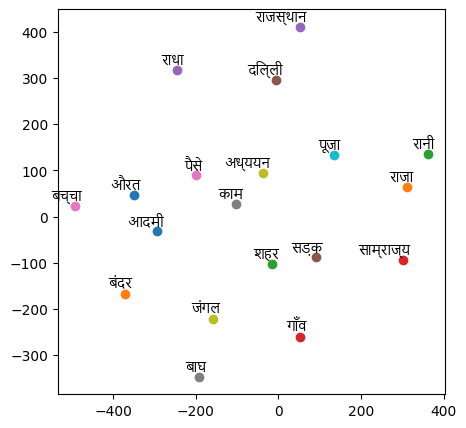

<Figure size 640x480 with 0 Axes>

In [122]:
plot(h_fasttext_embedding_matrix_dec, words_list,"fasttext_plot")

In [87]:
Embedding_dimensions=300
fasttext_embedding_matrix_dec = np.zeros((vocab_dec_length, Embedding_dimensions))

for word, token in vocab_dec.items():    
       fasttext_embedding_matrix_dec[token] = ft.get_word_vector(word)

print("Embedding Matrix Shape:", fasttext_embedding_matrix_dec.shape)

Embedding Matrix Shape: (1676, 300)


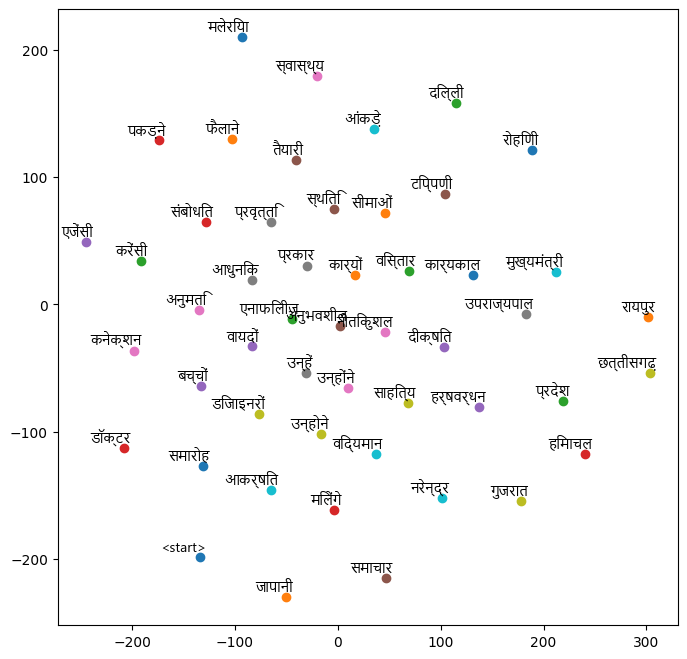

<Figure size 640x480 with 0 Axes>

In [88]:
plot(fasttext_embedding_matrix_dec, words_list,"fasttext_plot")

<font size = 6> Model Performance</font>

In [63]:
import matplotlib.pyplot as plt
def model_plot(x,y,y_label,title):
    plt.figure(figsize=(4, 4))
    plt.plot(x, y)
    plt.xlabel('epoch')
    plt.ylabel(y_label)
    plt.title(title)
    # function to show the plot
    plt.show()

In [71]:
#[train_loss,train_accuracy,val_loss,val_accuracy]
w2v_data = [[4.4294,0.5248 ,3.1721 ,0.5762],
[3.0902,0.5830 ,3.0181 ,0.5900],
[2.9495,0.5918 ,2.9585 ,0.5947],
[2.8609,0.5968 ,2.9097 ,0.5983],
[2.7815,0.6019 ,2.8605 ,0.6040],
[2.6945,0.6102 ,2.7919 ,0.6141],
[2.5915,0.6230 ,2.7131 ,0.6278],
[2.4769,0.6400 ,2.6136 ,0.6472],
[2.3271,0.6654 ,2.4627 ,0.6769],
[2.1312,0.6998 ,2.2781 ,0.7099],
[1.9182,0.7334 ,2.0881 ,0.7396],
[1.7206,0.7604 ,1.9320 ,0.7616],
[1.5465,0.7821 ,1.7941 ,0.7800],
[1.3908,0.8011 ,1.6726 ,0.7971],
[1.2500,0.8183 ,1.5607 ,0.8117],
[1.1228,0.8341 ,1.4660 ,0.8241],
[1.0043,0.8490 ,1.3718 ,0.8373],
[0.8963,0.8627 ,1.2874 ,0.8488],
[0.7959,0.8761 ,1.2094 ,0.8596],
[0.7076,0.8884 ,1.1450 ,0.8689],
[0.6317,0.8990 ,1.0908 ,0.8765],
[0.5640,0.9092 ,1.0512 ,0.8821],
[0.5052,0.9185 ,1.0078 ,0.8888],
[0.4532,0.9271 ,0.9714 ,0.8945],
[0.4055,0.9352 ,0.9453 ,0.8984],
[0.3672,0.9416 ,0.9148 ,0.9029],
[0.3346,0.9472 ,0.8934 ,0.9061],
[0.3047,0.9521 ,0.8690 ,0.9096],
[0.2780,0.9565 ,0.8544 ,0.9118],
[0.2556,0.9601 ,0.8493 ,0.9128],
[0.2359,0.9630 ,0.8289 ,0.9156],
[0.2188,0.9656 ,0.8236 ,0.9166],
[0.2074,0.9673 ,0.8055 ,0.9185],
[0.1889,0.9698 ,0.7964 ,0.9198],
[0.1802,0.9712 ,0.7909 ,0.9208],
[0.1745,0.9720 ,0.7874 ,0.9215],
[0.1610,0.9737 ,0.7786 ,0.9225],
[0.1503,0.9752 ,0.7789 ,0.9228],
[0.1436,0.9760 ,0.7790 ,0.9226],
[0.1417,0.9763 ,0.7642 ,0.9244],
[0.1327,0.9774 ,0.7609 ,0.9250],
[0.1266,0.9783 ,0.7556 ,0.9256],
[0.1235,0.9785 ,0.7508 ,0.9264],
[0.1206,0.9788 ,0.7857 ,0.9221],
[0.1135,0.9798 ,0.7498 ,0.9265],
[0.1132,0.9797 ,0.7413 ,0.9276],
[0.1067,0.9806 ,0.7555 ,0.9261],
[0.1037,0.9809 ,0.7357 ,0.9283],
[0.0976,0.9818 ,0.7398 ,0.9282],
[0.0985,0.9815 ,0.7349 ,0.9290]]

In [72]:
num_epoch = [i for i in range(1,len(w2v_data)+1)]

In [73]:
w2v_val_loss =[]
w2v_val_accuracy = []
w2v_train_loss =[]
w2v_train_accuracy = []

for each in w2v_data:
    w2v_train_loss.append(each[0])
    w2v_train_accuracy.append(each[1])
    w2v_val_loss.append(each[2])
    w2v_val_accuracy.append(each[3])
    

In [74]:
print(len(w2v_val_loss))
print(len(num_epoch))

50
50


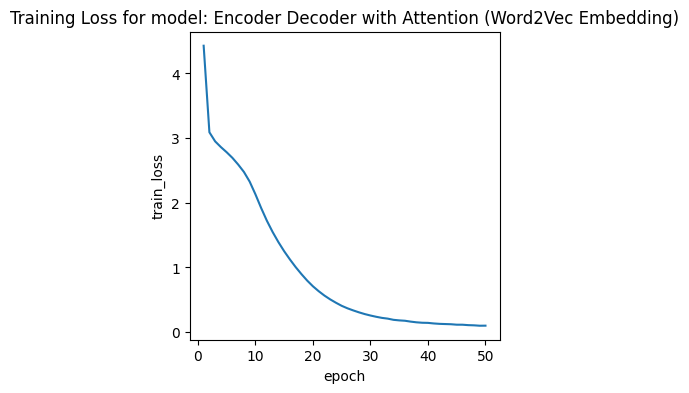

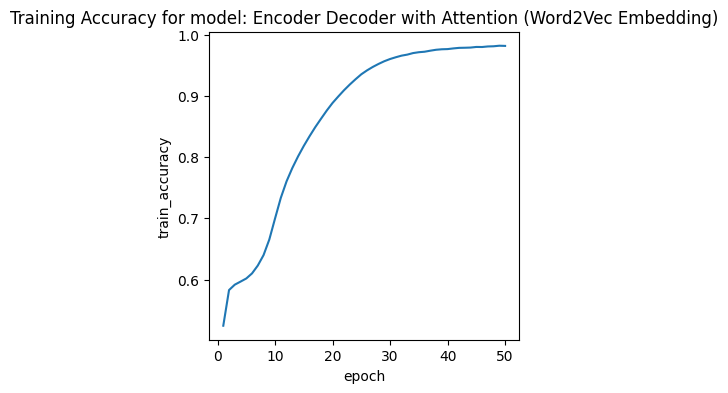

In [75]:
model_plot(num_epoch,w2v_train_loss,"train_loss","Training Loss for model: Encoder Decoder with Attention (Word2Vec Embedding)")
model_plot(num_epoch,w2v_train_accuracy,"train_accuracy","Training Accuracy for model: Encoder Decoder with Attention (Word2Vec Embedding)")

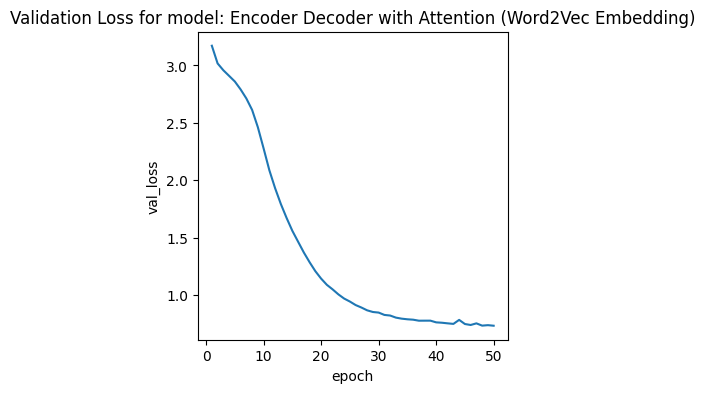

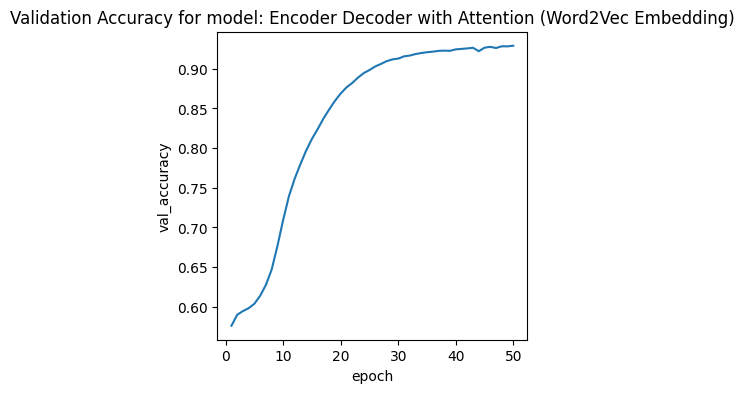

In [76]:
model_plot(num_epoch,w2v_val_loss,"val_loss","Validation Loss for model: Encoder Decoder with Attention (Word2Vec Embedding)")
model_plot(num_epoch,w2v_val_accuracy,"val_accuracy","Validation Accuracy for model: Encoder Decoder with Attention (Word2Vec Embedding)")

In [77]:
glove_data = [[4.4860,0.5252,3.3108,0.5600],
[3.2207,0.5704,3.1539,0.5806],
[3.0705,0.5854,3.0703,0.5915],
[2.9616,0.5957,3.0005,0.5988],
[2.8679,0.6055,2.9314,0.6086],
[2.7843,0.6147,2.8729,0.6175],
[2.6991,0.6274,2.8107,0.6301],
[2.5993,0.6421,2.7134,0.6458],
[2.4662,0.6599,2.5802,0.6649],
[2.2845,0.6840,2.3710,0.6935],
[2.0414,0.7158,2.1337,0.7249],
[1.7983,0.7473,1.9350,0.7509],
[1.5867,0.7744,1.7529,0.7749],
[1.4096,0.7973,1.6171,0.7941],
[1.2564,0.8169,1.4910,0.8120],
[1.1244,0.8339,1.4118,0.8241],
[1.0096,0.8487,1.3189,0.8363],
[0.9078,0.8618,1.2462,0.8469],
[0.8202,0.8735,1.1750,0.8571],
[0.7393,0.8846,1.1290,0.8641],
[0.6716,0.8941,1.0733,0.8724],
[0.6039,0.9040,1.0316,0.8791],
[0.5494,0.9122,0.9979,0.8843],
[0.5007,0.9200,0.9681,0.8893],
[0.4559,0.9274,0.9382,0.8943],
[0.4113,0.9352,0.9103,0.8991],
[0.3755,0.9415,0.9048,0.9006],
[0.3554,0.9455,0.8670,0.9059],
[0.3117,0.9530,0.8612,0.9073],
[0.2916,0.9568,0.8373,0.9108],
[0.2653,0.9614,0.8303,0.9118],
[0.2499,0.9638,0.8156,0.9146],
[0.2262,0.9677,0.8074,0.9157],
[0.2086,0.9704,0.7962,0.9172],
[0.1968,0.9723,0.7914,0.9181],
[0.1825,0.9742,0.7783,0.9199],
[0.1702,0.9760,0.7673,0.9208],
[0.1578,0.9776,0.7860,0.9188],
[0.1500,0.9787,0.7567,0.9228],
[0.1399,0.9800,0.7563,0.9228],
[0.1324,0.9807,0.7407,0.9247],
[0.1252,0.9815,0.7459,0.9240],
[0.1177,0.9825,0.7388,0.9253],
[0.1118,0.9830,0.7322,0.9258],
[0.1145,0.9826,0.7248,0.9267],
[0.0981,0.9847,0.7239,0.9269],
[0.0980,0.9844,0.7154,0.9279],
[0.0897,0.9855,0.7181,0.9278],
[0.0880,0.9856,0.7153,0.9278],
[0.0902,0.9851,0.7068,0.9287]]

In [78]:
glove_val_loss =[]
glove_val_accuracy = []
glove_train_loss =[]
glove_train_accuracy = []
num_epoch = [i for i in range(1,len(glove_data)+1)]
for each in glove_data:
    glove_train_loss.append(each[0])
    glove_train_accuracy.append(each[1])
    glove_val_loss.append(each[2])
    glove_val_accuracy.append(each[3])
    
print(len(glove_val_loss))
print(len(num_epoch))

50
50


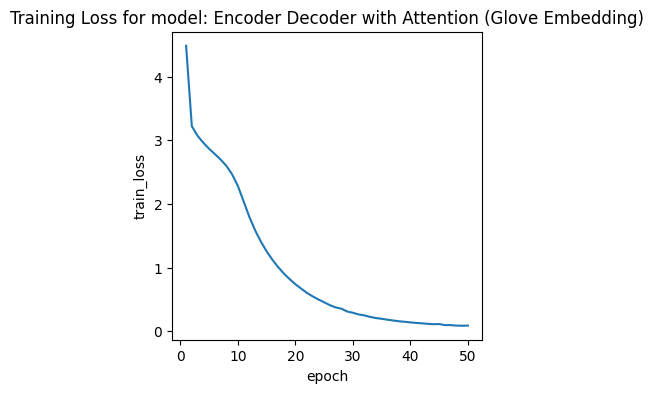

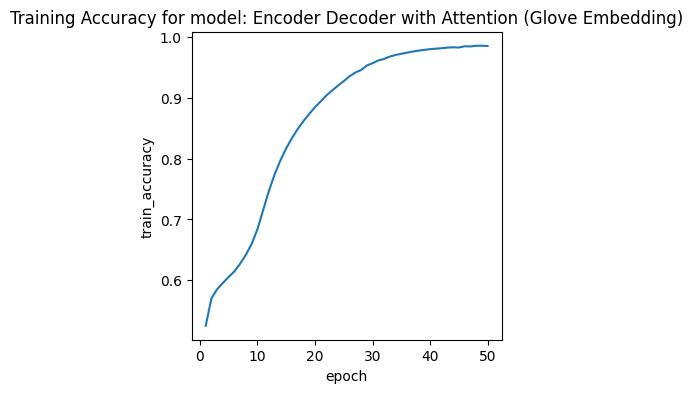

In [79]:
model_plot(num_epoch,glove_train_loss,"train_loss","Training Loss for model: Encoder Decoder with Attention (Glove Embedding)")
model_plot(num_epoch,glove_train_accuracy,"train_accuracy","Training Accuracy for model: Encoder Decoder with Attention (Glove Embedding)")

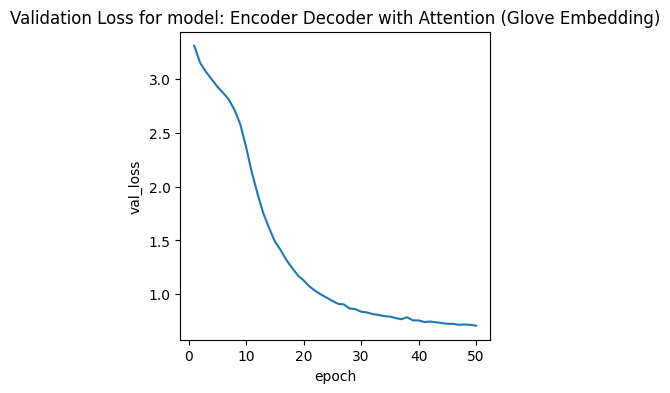

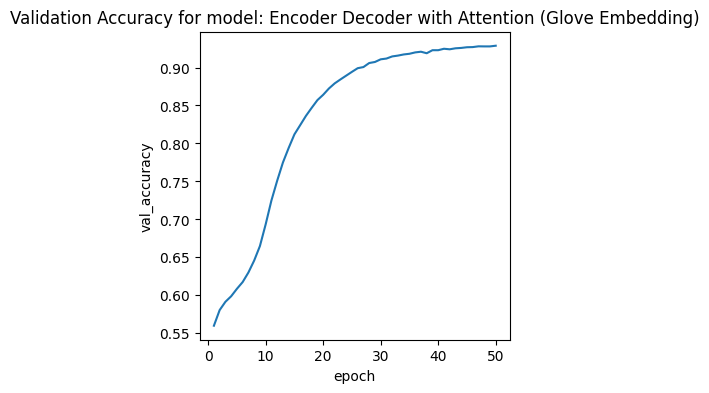

In [80]:
model_plot(num_epoch,glove_val_loss,"val_loss","Validation Loss for model: Encoder Decoder with Attention (Glove Embedding)")
model_plot(num_epoch,glove_val_accuracy,"val_accuracy","Validation Accuracy for model: Encoder Decoder with Attention (Glove Embedding)")

In [81]:
fasttext_data = [[3.6084,0.6617,2.3440,0.6881],
[2.2701,0.6950,2.2195,0.7035],
[2.1614,0.7068,2.1663,0.7087],
[2.0836,0.7116,2.1139,0.7128],
[2.0173,0.7155,2.0725,0.7166],
[1.9607,0.7196,2.0390,0.7204],
[1.9100,0.7234,2.0148,0.7228],
[1.8623,0.7263,1.9775,0.7258],
[1.8125,0.7297,1.9454,0.7290],
[1.7548,0.7353,1.8968,0.7364],
[1.6532,0.7528,1.7282,0.7660],
[1.3961,0.7977,1.3939,0.8187],
[1.0923,0.8437,1.1534,0.8510],
[0.8840,0.8733,0.9912,0.8748],
[0.7385,0.8940,0.8803,0.8899],
[0.6289,0.9087,0.7999,0.9015],
[0.5438,0.9200,0.7379,0.9098],
[0.4750,0.9291,0.6867,0.9171],
[0.4179,0.9367,0.6551,0.9217],
[0.3701,0.9430,0.6199,0.9269],
[0.3295,0.9485,0.5946,0.9304],
[0.2953,0.9531,0.5926,0.9312],
[0.2657,0.9575,0.5623,0.9355],
[0.2372,0.9618,0.5475,0.9381],
[0.2163,0.9653,0.5343,0.9401],
[0.1938,0.9692,0.5236,0.9421],
[0.1752,0.9727,0.5146,0.9437],
[0.1612,0.9756,0.5084,0.9452],
[0.1449,0.9787,0.5012,0.9462],
[0.1319,0.9811,0.4959,0.9471],
[0.1211,0.9830,0.4935,0.9478],
[0.1109,0.9848,0.4878,0.9486],
[0.1015,0.9863,0.4839,0.9495],
[0.0968,0.9871,0.4806,0.9503],
[0.0849,0.9887,0.4795,0.9506],
[0.0791,0.9895,0.4749,0.9512],
[0.0746,0.9899,0.4745,0.9513],
[0.0700,0.9904,0.4922,0.9497],
[0.0646,0.9911,0.4694,0.9525],
[0.0609,0.9914,0.4720,0.9527],
[0.0579,0.9918,0.4686,0.9529],
[0.0540,0.9921,0.4662,0.9535],
[0.0508,0.9924,0.4653,0.9536],
[0.0486,0.9926,0.4661,0.9536],
[0.0472,0.9927,0.4678,0.9531]]

In [83]:
fasttext_val_loss =[]
fasttext_val_accuracy = []
fasttext_train_loss =[]
fasttext_train_accuracy = []

num_epoch = [i for i in range(1,len(fasttext_data)+1)]
for each in fasttext_data:
    fasttext_train_loss.append(each[0])
    fasttext_train_accuracy.append(each[1])
    fasttext_val_loss.append(each[2])
    fasttext_val_accuracy.append(each[3])
    

print(len(fasttext_train_loss))
print(len(num_epoch))

45
45


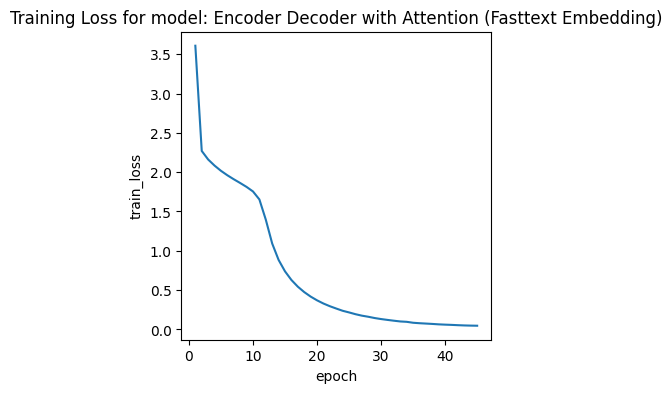

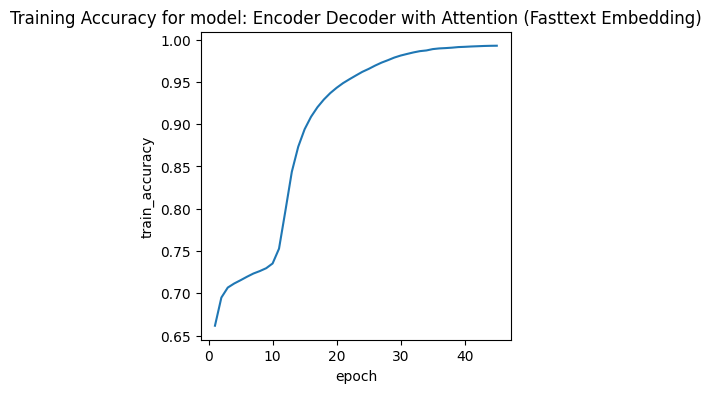

In [84]:

model_plot(num_epoch,fasttext_train_loss,"train_loss","Training Loss for model: Encoder Decoder with Attention (Fasttext Embedding)")
model_plot(num_epoch,fasttext_train_accuracy,"train_accuracy","Training Accuracy for model: Encoder Decoder with Attention (Fasttext Embedding)")

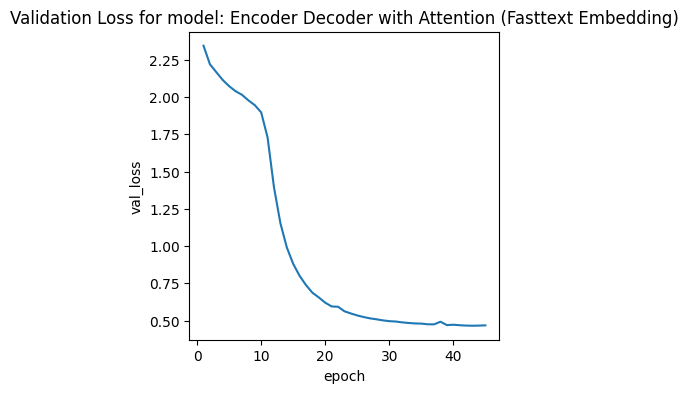

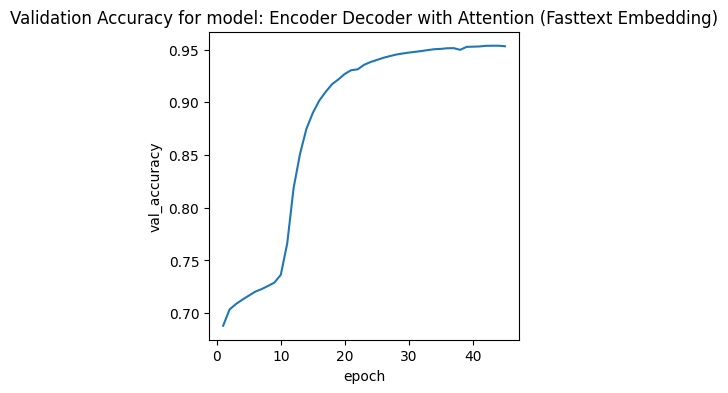

In [85]:
model_plot(num_epoch,fasttext_val_loss,"val_loss","Validation Loss for model: Encoder Decoder with Attention (Fasttext Embedding)")
model_plot(num_epoch,fasttext_val_accuracy,"val_accuracy","Validation Accuracy for model: Encoder Decoder with Attention (Fasttext Embedding)")

In [2]:
#trained on 140k datapoints
import pandas as pd
df_comp = pd.DataFrame()
df_comp["Model"] = ["Encoder Decoder", "Encoder Decoder with Attention"]
df_comp["Embedding"] = ["Trainable Embedding" ,"Trainable Embedding"]
df_comp["Validation Accuracy(%)"] = ["69.55","99.02"]

df_comp["BLEU Score (Greedy Search)"] = ["0.30497","0.76631"]    #10k test data points
#df_comp["Model Size(bytes)"] = [word_ed,word_eda]
df_comp["Model Size(bytes)"] = ["63934283","82746700"]
df_comp["Model Parameters"] = ["63934283","82746700"]
df_comp["Inference Time(ms)"] = ["177","186"]
df_comp

,Model,Embedding,Validation Accuracy(%),BLEU Score (Greedy Search),Model Size(bytes),Model Parameters,Inference Time(ms)
0,Encoder Decoder,Trainable Embedding,69.55,0.30497,63934283,63934283,177
1,Encoder Decoder with Attention,Trainable Embedding,99.02,0.76631,82746700,82746700,186


<font size ="6"><b>Comparison of different Trained Models for Hindi</b></font>

In [6]:
#trained on 140k datapoints
import pandas as pd
df_comp = pd.DataFrame()
df_comp["Model"] = ["Encoder Decoder", "Encoder Decoder with Attention"]
df_comp["Embedding"] = ["Trainable Embedding" ,"Trainable Embedding"]
df_comp["Validation Accuracy(%)"] = ["69.55","99.02"]

df_comp["BLEU Score (Greedy Search)"] = ["0.30497","0.76631"]    #10k test data points
#df_comp["Model Size(bytes)"] = [word_ed,word_eda]
df_comp["Model Size(bytes)"] = ["63934283","82746700"]
df_comp["Model Parameters"] = ["63934283","82746700"]
df_comp["Inference Time(ms)"] = ["177","186"]
df_comp

,Model,Embedding,Validation Accuracy(%),BLEU Score (Greedy Search),Model Size(bytes),Model Parameters,Inference Time(ms)
0,Encoder Decoder,Trainable Embedding,69.55,0.30497,63934283,63934283,177
1,Encoder Decoder with Attention,Trainable Embedding,99.02,0.76631,82746700,82746700,186


In [7]:
df_comp = pd.DataFrame()
df_comp["Model"] = ["Encoder Decoder with Attention","Encoder Decoder with Attention","Encoder Decoder with Attention"]
df_comp["Embedding"] = ["Word2Vec", "Glove", "Fasttext"]
df_comp["Training Accuracy(%)"] = ["98.08","98.86","99.30"]
df_comp["Validation Accuracy(%)"] = ["95.44","96.15","96.55"]

df_comp["BLEU Score (Greedy Search)"] = ["0.7796"," 0.82002","0.8458"]    #10k test data points
df_comp["BLEU Score(Beam Search)"] = ["0.7935","0.82905","0.8538"]   #2k test data points
#df_comp["Model Size(bytes)"] = [w2v_eda,glv_eda,ftxt_eda]
df_comp["Model Size(bytes)"] = ["195513652","195513652","195513652"]
df_comp["Model Parameters"] = ["48870508","48870508","48870508"]
df_comp["Inference Time(ms)"] = ["273","253","345"]

df_comp

,Model,Embedding,Training Accuracy(%),Validation Accuracy(%),BLEU Score (Greedy Search),BLEU Score(Beam Search),Model Size(bytes),Model Parameters,Inference Time(ms)
0,Encoder Decoder with Attention,Word2Vec,98.08,95.44,0.7796,0.7935,195513652,48870508,273
1,Encoder Decoder with Attention,Glove,98.86,96.15,0.82002,0.82905,195513652,48870508,253
2,Encoder Decoder with Attention,Fasttext,99.30,96.55,0.8458,0.8538,195513652,48870508,345


In [53]:
# Trained on 50k data points
word_eda = os.path.getsize("models/attention_concat_best_half.h5")
w2v_eda = os.path.getsize("models/word2vec_attention_concat_best_half.h5")
glv_eda = os.path.getsize("models/glove_attention_concat_best_half.h5")
ftxt_eda = os.path.getsize("models/fasttext_attention_concat_best_half.h5")

df_comp = pd.DataFrame()
df_comp["Model"] = ["Encoder Decoder with Attention", "Encoder Decoder with Attention","Encoder Decoder with Attention","Encoder Decoder with Attention"]
df_comp["Embedding"] = ["Trainable", "Word2Vec", "Glove", "Fasttext"]
df_comp["Validation Accuracy(%)"] = ["99.02","92.90","92.87","95.31"]

df_comp["BLEU Score (Greedy Search)"] = ["0.58352","0.69013"," 0.70426","0.73484"]    #10k test data points
df_comp["BLEU Score(Beam Search)"] = ["0.7130","0.71311","0.72223","0.74326"]   #1k test data points
df_comp["Model Size(bytes)"] = [word_eda,w2v_eda,glv_eda,ftxt_eda]
df_comp["Model Parameters"] = ["29433538","29433538","29433538","29433538"]
df_comp["Inference Time(ms)"] = ["200","244","222","246"]
df_comp

,Model,Embedding,Validation Accuracy(%),BLEU Score (Greedy Search),BLEU Score(Beam Search),Model Size(bytes),Model Parameters,Inference Time(ms)
0,Encoder Decoder with Attention,Trainable,99.02,0.58352,0.7130,117766508,29433538,200
1,Encoder Decoder with Attention,Word2Vec,92.90,0.69013,0.71311,117765772,29433538,244
2,Encoder Decoder with Attention,Glove,92.87,0.70426,0.72223,117765772,29433538,222
3,Encoder Decoder with Attention,Fasttext,95.31,0.73484,0.74326,117765772,29433538,246


In [6]:
# Trained on full data points

w2v_eda = os.path.getsize("models/word2vec_attn_full.h5")
glv_eda = os.path.getsize("models/glove_attn_best_full.h5")
ftxt_eda = os.path.getsize("models/fasttext_attn_best_full.h5")

df_comp = pd.DataFrame()
df_comp["Model"] = ["Encoder Decoder with Attention","Encoder Decoder with Attention","Encoder Decoder with Attention"]
df_comp["Embedding"] = ["Word2Vec", "Glove", "Fasttext"]
df_comp["Training Accuracy(%)"] = ["98.08","98.86","99.30"]
df_comp["Validation Accuracy(%)"] = ["95.44","96.15","96.55"]

df_comp["BLEU Score (Greedy Search)"] = ["0.7796"," 0.82002","0.8458"]    #10k test data points
df_comp["BLEU Score(Beam Search)"] = ["0.7935","0.82905","0.8538"]   #2k test data points
#df_comp["Model Size(bytes)"] = [w2v_eda,glv_eda,ftxt_eda]
df_comp["Model Size(bytes)"] = ["195513652","195513652","195513652"]
df_comp["Model Parameters"] = ["48870508","48870508","48870508"]
df_comp["Inference Time(ms)"] = ["273","253","345"]

df_comp

,Model,Embedding,Training Accuracy(%),Validation Accuracy(%),BLEU Score (Greedy Search),BLEU Score(Beam Search),Model Size(bytes),Model Parameters,Inference Time(ms)
0,Encoder Decoder with Attention,Word2Vec,98.08,95.44,0.7796,0.7935,195513652,48870508,273
1,Encoder Decoder with Attention,Glove,98.86,96.15,0.82002,0.82905,195513652,48870508,253
2,Encoder Decoder with Attention,Fasttext,99.30,96.55,0.8458,0.8538,195513652,48870508,345


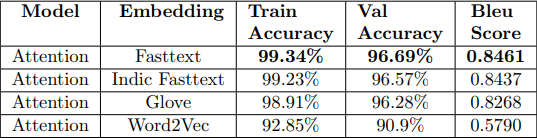

In [8]:
from IPython.display import Image
Image(filename='results_trained/Vyoma_result.PNG') 

In [9]:
print("Results on proposed method Vyakaranly Word level Hindi Models")

Results on proposed method Vyakaranly Word level Hindi Models
